# G4Bench benchmark results

`Geant4 v11.3.0` Multi-Thread Performance

- AMD Ryzen Threadripper PRO 7985WX (3.2GHz / 5.1GHz) 64 cores x 1 SMT : Ubuntu 24.04LTS
- AMD EPYC 9534 (2.45GHz / 3.55GHz) 64 cores x 1 SMT : RedHat EL 9.5
- AMD EPYC 7643 (2.3GHz / 3.6GHz) 48 cores x 2 SMT : AlmaLinux 9.5
- Intel Xeon Gold 6430 (2.1GHz / 3.4GHz) 24cores x 2 HT : RedHat EL 9.5
- AMD Ryzen Threadripper PRO 5995WX (2.7GHz / 4.5GHz) 64 cores x 1 SMT : Ubuntu 24.04LTS
- Intel Xeon Gold 6336Y (2.4GHz / 3.6GHz) 24cores x 2 HT : AlmaLinux 9.5
- AMD Ryzen 9 7950X (4.5GHz / 5.7GHz) 16 cores x 1 SMT : Ubuntu 22.04LTS

## EPS ECAL e- 1GeV shower simulation

In [27]:
import pandas
import json
import os

data_dir = "./data/11.3.0/"
cpu_list = os.listdir(data_dir)
cpu_list

['ryzen_trpro_7985wx',
 'epyc_9534',
 'ryzen_7950x',
 'xeon_6430',
 'ryzen_trpro_5995wx',
 'xeon_6336y',
 'epyc_7643']

In [28]:
def make_df(data_dir, data_header):
    #df_th = pandas.DataFrame(columns = ['name', 'date', 'cpu', 'g4version', 'thread', 'event', 'time', 'init', 'tpe', 'eps', 'sps', 'edep'])
    df_th = []
    cpu_list = os.listdir(data_dir)
    for cpu in cpu_list:
        df_th.append(pandas.read_json(data_dir + "/" + cpu + "/" + data_header + ".json"))
        df_th[-1] = df_th[-1].sort_values('thread')

    return df_th

In [29]:
import matplotlib.pyplot as plt
import numpy

In [30]:
def plot_mt(df, title="Benchmark", ymax=10000):
    plt.figure(figsize=(16,8))
    plt.title(title)
    plt.xlabel("#threads")
    plt.ylabel("EPS (events/msec)")
    plt.xlim([0, 200])
    plt.ylim([0, ymax])
    plt.grid(which="both", color="#cccccc")
    
    nplots = len(df)
    for i in range(nplots):
        plot = plt.plot(df[i]['thread'], df[i]['eps']*1000, 'o-', markersize=8, label=df[i]['cpu'][0])

    plt.legend()

## ECAL e- 1GeV shower simulation

In [31]:
df_ecal = make_df("data/11.3.0/", "ecal_e1000")
df_ecal[1]

,name,date,cpu,g4version,thread,event,time,init,tpe,eps,sps,edep
0,ecal_e1000,2025-01-21 00:43:00,AMD EPYC 9534 64-Core Processor,1130,1,20000,80.0368,0.007103,4.001840,0.249907,1088.86,967.684
3,ecal_e1000,2025-01-21 00:44:28,AMD EPYC 9534 64-Core Processor,1130,2,40000,86.6483,0.007287,2.166210,0.461675,2011.45,967.701
6,ecal_e1000,2025-01-21 00:45:57,AMD EPYC 9534 64-Core Processor,1130,4,80000,88.2253,0.007913,1.102820,0.906851,3951.70,967.733
11,ecal_e1000,2025-01-21 00:47:28,AMD EPYC 9534 64-Core Processor,1130,8,160000,89.7327,0.009341,0.560829,1.783260,7769.75,967.758
2,ecal_e1000,2025-01-21 00:49:01,AMD EPYC 9534 64-Core Processor,1130,16,320000,91.9788,0.011363,0.287434,3.479490,15158.40,967.678
4,ecal_e1000,2025-01-21 00:50:32,AMD EPYC 9534 64-Core Processor,1130,24,480000,90.3885,0.014567,0.188309,5.311270,23137.50,967.696
5,ecal_e1000,2025-01-21 00:52:04,AMD EPYC 9534 64-Core Processor,1130,32,640000,90.7358,0.016207,0.141775,7.054700,30731.90,967.678
7,ecal_e1000,2025-01-21 00:53:36,AMD EPYC 9534 64-Core Processor,1130,40,800000,91.0703,0.014764,0.113838,8.785840,38272.90,967.671
8,ecal_e1000,2025-01-21 00:55:10,AMD EPYC 9534 64-Core Processor,1130,48,960000,92.3191,0.019368,0.096166,10.400900,45308.60,967.662
9,ecal_e1000,2025-01-21 00:56:42,AMD EPYC 9534 64-Core Processor,1130,56,1120000,90.7180,0.012097,0.080998,12.347600,53788.90,967.680


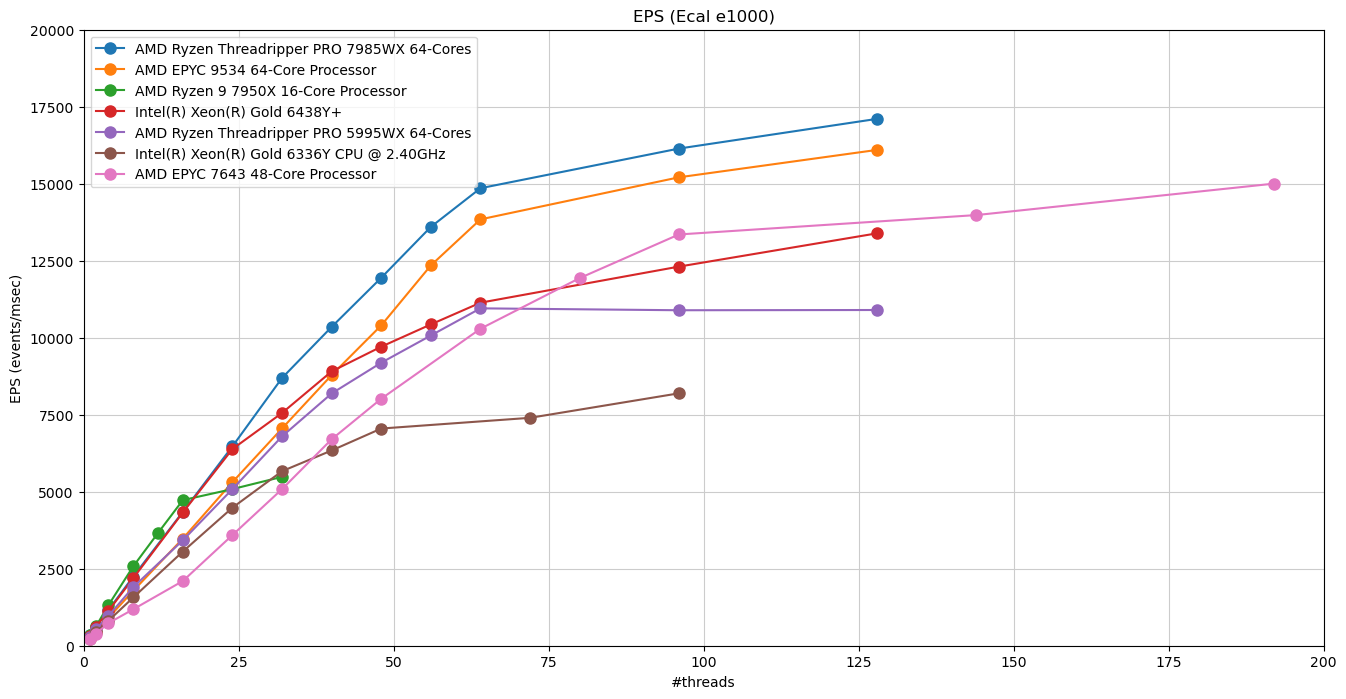

In [32]:
plot_mt(df_ecal, title="EPS (Ecal e1000)", ymax=20000)

## HCAL proton 10GeV hadron shower simulation

In [33]:
df_hcal = make_df("data/11.3.0/", "hcal_p10")
df_hcal[1]

,name,date,cpu,g4version,thread,event,time,init,tpe,eps,sps,edep
0,hcal_p10,2025-01-21 01:04:51,AMD EPYC 9534 64-Core Processor,1130,1,4000,106.261,0.001407,26.565200,0.037644,587.294,850.952
3,hcal_p10,2025-01-21 01:06:41,AMD EPYC 9534 64-Core Processor,1130,2,8000,108.896,0.001738,13.612000,0.073466,1151.550,852.593
6,hcal_p10,2025-01-21 01:08:35,AMD EPYC 9534 64-Core Processor,1130,4,16000,112.859,0.002238,7.053660,0.141773,2218.660,850.300
11,hcal_p10,2025-01-21 01:10:30,AMD EPYC 9534 64-Core Processor,1130,8,32000,113.328,0.003273,3.541510,0.282373,4411.210,848.259
2,hcal_p10,2025-01-21 01:12:24,AMD EPYC 9534 64-Core Processor,1130,16,64000,112.964,0.005040,1.765070,0.566577,8839.250,847.524
4,hcal_p10,2025-01-21 01:14:18,AMD EPYC 9534 64-Core Processor,1130,24,96000,112.704,0.006753,1.174000,0.851838,13299.800,847.903
5,hcal_p10,2025-01-21 01:16:17,AMD EPYC 9534 64-Core Processor,1130,32,128000,117.921,0.009290,0.921256,1.085560,16955.500,847.871
7,hcal_p10,2025-01-21 01:18:12,AMD EPYC 9534 64-Core Processor,1130,40,160000,113.788,0.011295,0.711174,1.406270,21964.200,847.470
8,hcal_p10,2025-01-21 01:20:14,AMD EPYC 9534 64-Core Processor,1130,48,192000,120.796,0.011965,0.629148,1.589610,24842.100,847.705
9,hcal_p10,2025-01-21 01:22:14,AMD EPYC 9534 64-Core Processor,1130,56,224000,118.412,0.014125,0.528625,1.891930,29561.400,847.450


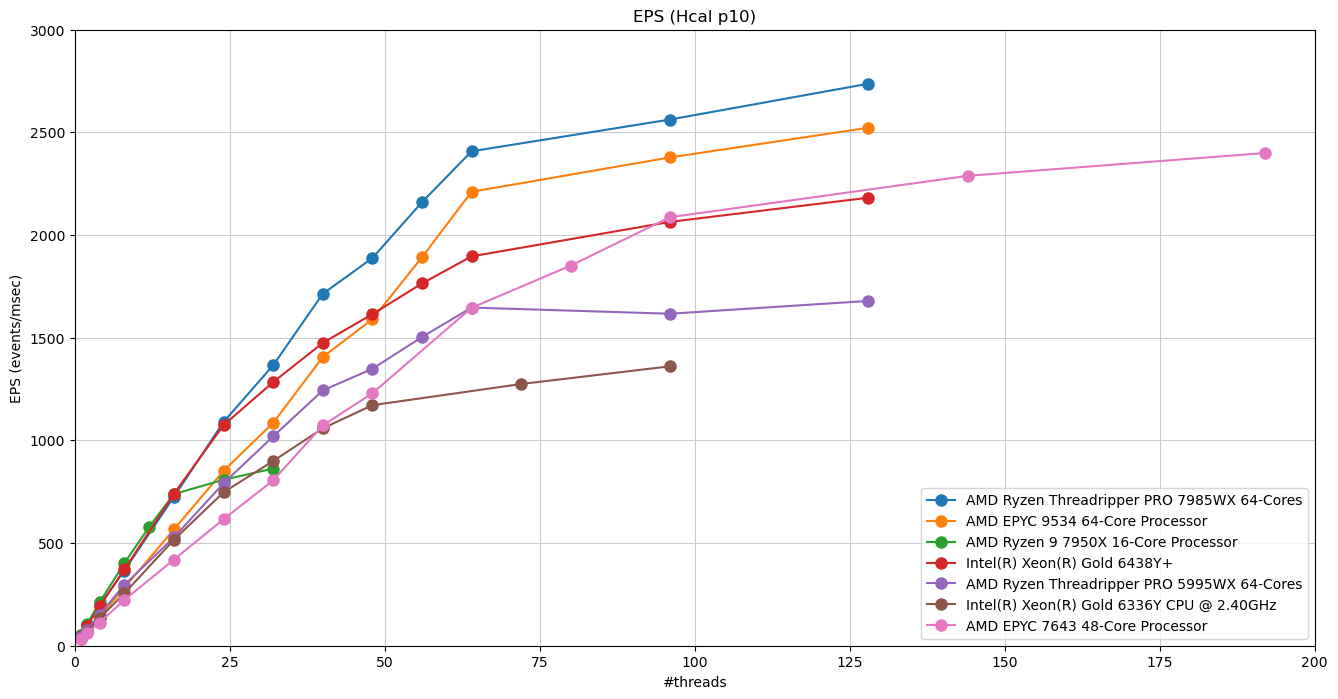

In [34]:
plot_mt(df_hcal, title="EPS (Hcal p10)", ymax=3000)

## VGEO X-ray 18MV water phantom simulation

In [35]:
df_vgeo = make_df("data/11.3.0/", "vgeo_x18")
df_vgeo[1]

,name,date,cpu,g4version,thread,event,time,init,tpe,eps,sps,edep
0,vgeo_x18,2025-01-21 01:31:31,AMD EPYC 9534 64-Core Processor,1130,1,500000,70.9916,0.001559,0.141983,7.04324,1454.05,1.90360
3,vgeo_x18,2025-01-21 01:32:48,AMD EPYC 9534 64-Core Processor,1130,2,1000000,77.0559,0.001700,0.077056,12.97790,2679.93,1.90241
6,vgeo_x18,2025-01-21 01:34:11,AMD EPYC 9534 64-Core Processor,1130,4,2000000,82.5490,0.002167,0.041274,24.22870,5002.80,1.90197
11,vgeo_x18,2025-01-21 01:35:33,AMD EPYC 9534 64-Core Processor,1130,8,4000000,80.6610,0.003336,0.020165,49.59230,10236.40,1.90174
2,vgeo_x18,2025-01-21 01:36:54,AMD EPYC 9534 64-Core Processor,1130,16,8000000,81.3259,0.005007,0.010166,98.37570,20302.20,1.90164
4,vgeo_x18,2025-01-21 01:38:17,AMD EPYC 9534 64-Core Processor,1130,24,12000000,82.1681,0.007069,0.006847,146.05500,30140.30,1.90201
5,vgeo_x18,2025-01-21 01:39:40,AMD EPYC 9534 64-Core Processor,1130,32,16000000,81.9938,0.009052,0.005125,195.15800,40272.40,1.90188
7,vgeo_x18,2025-01-21 01:41:04,AMD EPYC 9534 64-Core Processor,1130,40,20000000,83.1666,0.011660,0.004158,240.51500,49631.30,1.90177
8,vgeo_x18,2025-01-21 01:42:27,AMD EPYC 9534 64-Core Processor,1130,48,24000000,83.1425,0.013679,0.003464,288.70800,59572.60,1.90156
9,vgeo_x18,2025-01-21 01:43:49,AMD EPYC 9534 64-Core Processor,1130,56,28000000,80.9461,0.015643,0.002891,345.97600,71390.00,1.90170


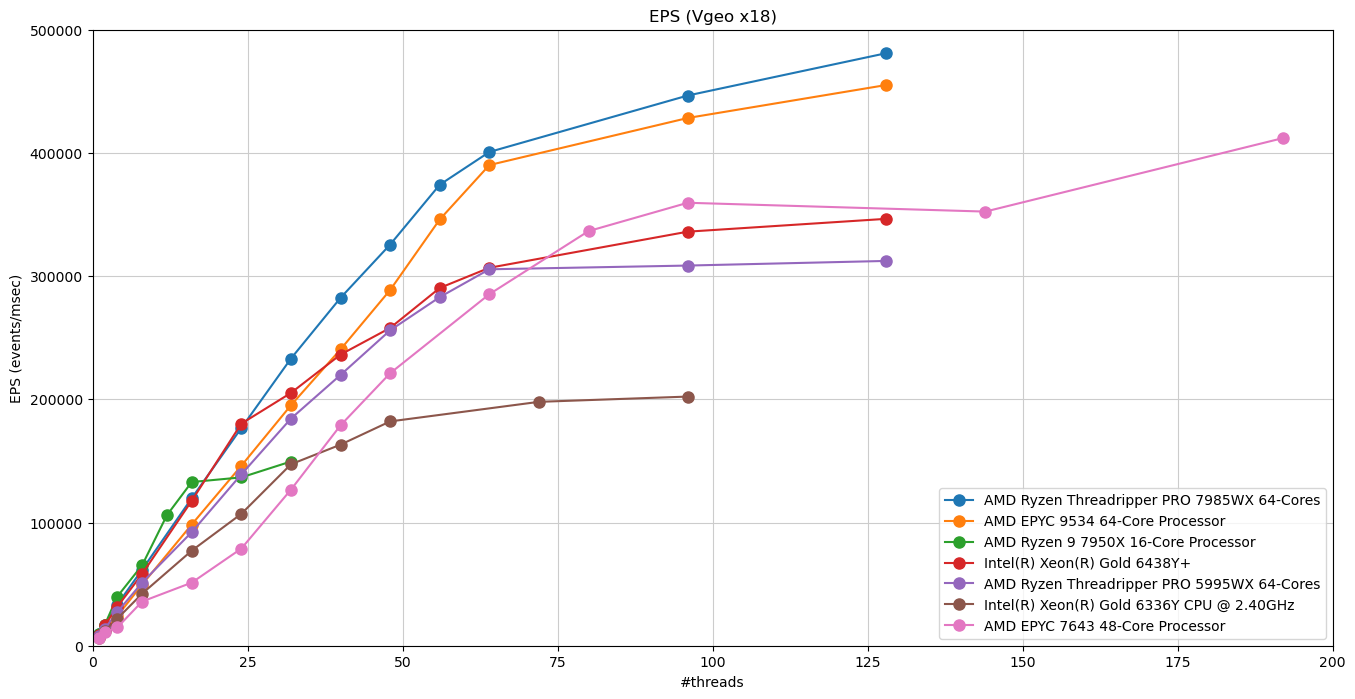

In [36]:
plot_mt(df_vgeo, title="EPS (Vgeo x18)", ymax= 500000)